In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

In [5]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y = pd.DataFrame(iris_data.target, columns=['class'])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [16]:
## make decision tree
model = DecisionTreeClassifier(max_depth=4)

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
model.predict(X_test)

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [19]:
## evaluate
model.score(X_test, y_test)

0.9

In [24]:
## feature importances
importances = model.feature_importances_
importances

array([0.02378049, 0.        , 0.02264808, 0.95357143])

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
indices_sorted = np.argsort(importances)
indices_sorted

array([1, 2, 0, 3])

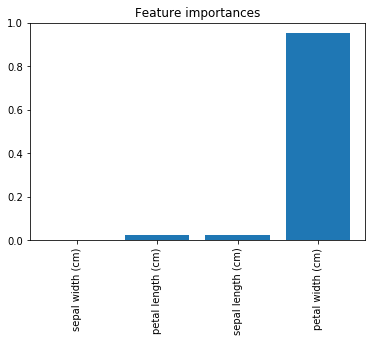

In [25]:
## visualization
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

In [26]:
## practice with another dataset (breast cancer data)
##

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

In [37]:
breast_cancer_data = load_breast_cancer()
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [38]:
## data setting
X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
y = pd.DataFrame(breast_cancer_data.target, columns=['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()  ## for not warning msg

In [39]:
## train, test model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [40]:
print(predictions)
print(score)

[0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 1]
0.9473684210526315
